In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('lab01_dataset_2.csv')
data.head()

,X,Y,Z,Class
0,-2.153269,-1.910092,-2.089200,Negative
1,3.354634,-1.803199,-2.849789,Negative
2,-2.773528,4.644997,2.412375,Positive
3,2.890608,-1.188494,-1.723388,Negative
4,-3.416683,4.789795,3.157649,Positive


In [11]:
data.shape

(200, 4)

In [12]:
def my_perceptron():
    thresholdRate = 0.01
    weight = [1, 2, 3]
    X = data.iloc[:, :-1].values
    Y = np.where (data.iloc[:,-1] == "Positive", 1, -1)
    bias = 0
    misClassificationRate = 1.0

    while (misClassificationRate > thresholdRate):
        for i in range(0, len(X)):
            misClassifiedDataPoints = 0
            # print("X values : ", X[i], "weight : ", weight, " | Y[i] * (np.dot(X[i], weight) + bias) : ", Y[i] * (np.dot(X[i], weight) + bias))
            if Y[i] * (np.dot(X[i], weight) + bias) <= 0 :
                weight += Y[i] * X[i]
                bias += Y[i]
                misClassifiedDataPoints += 1
                print("Misclassified | ", bias, " | weight : ", weight)
            
        misClassificationRate = misClassifiedDataPoints / len(X)
    print(misClassificationRate)
    return np.concatenate(([bias], weight))

weightedn = my_perceptron()
print(weightedn)

Misclassified |  -1  | weight :  [-3.61874851  3.82859697  2.29473929]
Misclassified |  0  | weight :  [-0.65363027  5.5543439   2.22143049]
0.0
[ 0.         -0.65363027  5.5543439   2.22143049]


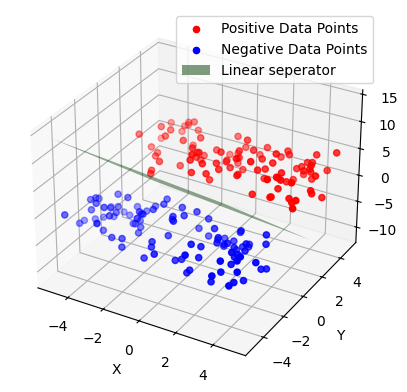

In [13]:
def build3DGraph():
    figure = plt.figure()
    figure = figure.add_subplot(111, projection='3d')

    figure.scatter(data.loc[data['Class'] == 'Positive', 'X'],
                            data.loc[data['Class'] == 'Positive', 'Y'],
                            data.loc[data['Class'] == 'Positive', 'Z'],
                            color='red',
                            label='Positive Data Points'
                    )
    
    figure.scatter(data.loc[data['Class'] == 'Negative', 'X'], 
                   data.loc[data['Class'] == 'Negative', 'Y'],
                   data.loc[data['Class'] == 'Negative', 'Z'],
                    color='blue',
                            label='Negative Data Points')
    
    x_axis, y_axis = np.meshgrid(range(-5, 5), range(-5, 5))
    z_axis = (-0 - 0.65363027 * x_axis -  5.5543439 * y_axis ) /  2.22143049
    figure.plot_surface(x_axis, y_axis, z_axis, color='green', alpha= 0.5, label = 'Linear seperator')

    figure.set_xlabel('X')
    figure.set_ylabel('Y')
    figure.set_zlabel('Z')

    plt.legend()
    plt.show()

build3DGraph()

Final weights: [-0.65363027  5.5543439   2.22143049]


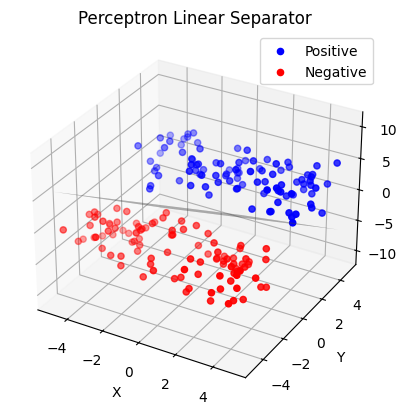

In [1]:
import numpy as np
import pandas as pd

def my_perceptron(df):

    X = df[['X', 'Y', 'Z']].values
    y = (df['Class'] == 'Positive').astype(int) * 2 - 1

    # Initialize weights including bias term
    w = np.array([1, 2, 3, 0.0], dtype=float)

    # Add a column of ones to X for the bias term
    X = np.hstack((X, np.ones((X.shape[0], 1))))  # Adding bias term (column of 1s)

    # Set the classification threshold
    threshold = 0.01  # Misclassification rate target (1% misclassification)

    while True:
        mistakes = 0
        for i, sample in enumerate(X):
            prediction = np.sign(np.dot(w, sample))
            if prediction != y[i]:
                w += y[i] * sample
                mistakes += 1

        # Calculate misclassification rate
        misclassification_rate = mistakes / len(X)
        if misclassification_rate < threshold:
            break

    # Return only the weight vector for features (excluding the bias term)
    return w[:3]  # Exclude the bias term weight


# Load the dataset
df = pd.read_csv('lab01_dataset_2.csv')

# Compute the weight vector
weights = my_perceptron(df)
print("Final weights:", weights)

 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_perceptron(dataset):
    # Initialize weights including bias
    w = np.array([1, 2, 3, 0.0], dtype=float)
    threshold = 0.01  # Misclassification rate threshold
    learning_rate = 1

    # Add a column of ones to include bias in the feature matrix
    dataset_with_bias = np.hstack([np.ones((dataset.shape[0], 1)), dataset.iloc[:, :-1].values])
    labels = np.where(dataset.iloc[:, -1] == 'Positive', 1, -1)

    while True:
        misclassifications = 0
        for i in range(len(dataset_with_bias)):
            x = dataset_with_bias[i]
            y_true = labels[i]
            y_pred = np.sign(np.dot(w, x))

            if y_pred != y_true:
                w = w + learning_rate * y_true * x
                misclassifications += 1

        misclassification_rate = misclassifications / len(dataset_with_bias)
        if misclassification_rate < threshold:
            break

    return w

# Load the dataset
dataset = pd.read_csv('lab01_dataset_2.csv')

# Apply the perceptron algorithm
weights = my_perceptron(dataset)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
positive_data = dataset[dataset['Class'] == 'Positive']
negative_data = dataset[dataset['Class'] == 'Negative']
ax.scatter(positive_data['X'], positive_data['Y'], positive_data['Z'], c='blue', label='Positive')
ax.scatter(negative_data['X'], negative_data['Y'], negative_data['Z'], c='red', label='Negative')

# Plot the linear separator
x1_range = np.linspace(dataset['X'].min(), dataset['X'].max(), 10)
x2_range = np.linspace(dataset['Y'].min(), dataset['Y'].max(), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
X3 = (-weights[0] - weights[1] * X1 - weights[2] * X2) / weights[3]
print ( "X1 = " , X1, " | X2 = " ,X2 ,  " | X3 = ", X3)
# Plot the decision boundary
ax.plot_surface(X1, X2, X3, alpha=0.5, color='gray', edgecolor='none')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Perceptron Linear Separator')
# ax.legend()

# plt.show()

